In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Steup data frame and dates for daily precipitation data by year
year = 2021
df = pd.DataFrame(columns=['station'])
dts = pd.date_range(str(year) + "-01-01", str(year) + "-12-31", freq="D")

In [3]:
# Retrieve precipitation data for year and merge into dataframe
for dt in dts:
    d = str(dt.date())
    dt_df = pd.read_csv(f'outputs/prcp/{year}/csv/{d}.csv')
    df = df.merge(dt_df, on='station', how='outer')

In [4]:
# Add Station Information to Dataframe
stn_df = pd.read_csv(f'outputs/prcp/{year}/CA_{year}_coords.csv')
df = df.merge(stn_df, on='station')
df

,station,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,...,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31,lat,lon,elev,name
0,US1CAAL0001,0.0,3.8,2.8,0.5,14.2,0.0,1.0,0.3,0.0,...,18.3,18.0,0.5,10.2,0.0,0.0,37.8123,-122.2160,113.4,CA PIEDMONT 1.0 SE
1,US1CAAL0003,0.0,1.0,3.0,3.0,11.9,0.0,0.5,0.0,0.0,...,19.3,24.9,0.8,NaN,2.8,0.0,37.7169,-122.0585,163.4,CA CASTRO VALLEY 0.4 NNE
2,US1CAAL0004,0.0,0.8,2.5,0.8,11.9,0.0,0.5,0.0,0.0,...,26.4,19.3,2.0,4.1,2.5,0.0,37.6483,-121.8745,107.0,CA PLEASANTON 1.8 SSE
3,US1CAAL0006,NaN,2.5,1.5,2.3,5.6,NaN,1.0,0.8,NaN,...,18.0,16.8,0.3,8.6,4.3,NaN,37.8319,-122.2503,58.2,CA OAKLAND 4.4 NNW
4,US1CAAL0011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.8,21.6,NaN,NaN,30.5,NaN,37.6821,-122.1332,9.1,CA SAN LORENZO 0.5 NNW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,USW00093241,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.5,15.7,0.0,0.0,38.3775,-121.9586,31.7,CA VACAVILLE/NUT TREE AP ASOS
1178,USW00093242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.1,0.0,1.0,0.0,0.0,36.9850,-120.1106,76.5,CA MADERA MUNI AP
1179,USW00093243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,37.2381,-120.8825,23.8,CA MERCED 23 WSW CRN
1180,USW00093245,2.7,2.0,0.5,14.3,0.0,6.9,0.8,2.6,0.0,...,0.0,8.0,1.1,0.6,0.0,0.0,38.3208,-123.0747,19.2,CA BODEGA 6 WSW CRN


In [5]:
date_columns = df.columns[1:366]  # Adjust this if necessary

# Convert the daily columns to numeric (if they are not already)
df[date_columns] = df[date_columns].apply(pd.to_numeric, errors='coerce')

# Initialize a dictionary to hold the monthly data
monthly_data = {}

# Iterate over each station
for station in df.index:
    monthly_totals = []
    for month in range(1, 13):
        # Generate the date range for the current month
        days_in_month = pd.date_range(f'2021-{month:02d}-01', periods=31)  # Adjust periods for different months if necessary
        days_in_month = days_in_month[days_in_month.month == month]  # Ensure only the current month is included
        
        # Find the corresponding columns in the DataFrame
        daily_columns = [col for col in df.columns if col in days_in_month.strftime('%Y-%m-%d')]
        
        # Sum the daily values for the current month
        monthly_total = df.loc[station, daily_columns].sum()
        monthly_totals.append(monthly_total)
    
    monthly_data[station] = monthly_totals

# Create a new DataFrame with the monthly totals
monthly_df = pd.DataFrame(monthly_data, index=[f'2021-{month:02d}' for month in range(1, 13)]).T

# Add the metadata columns back to the new DataFrame
metadata_columns = ['lat', 'lon', 'elev', 'name']  # Adjust this list based on your actual DataFrame
monthly_df = pd.concat([monthly_df, df[metadata_columns]], axis=1)

# Remove rows with NaN values
monthly_df = monthly_df.dropna()

# Sum each month
monthly_sums2021 = monthly_df.sum(axis=0)

# Display the resulting DataFrame and the monthly sums
print(monthly_df)
print(monthly_sums2021)

      2021-01  2021-02  2021-03  2021-04  2021-05  2021-06  2021-07  2021-08  \
0        90.7     38.1     58.2      3.3      0.3      0.0      0.0      0.0   
1        84.9     49.4     49.9      4.8      0.8      1.5      0.0      0.0   
2       100.6     19.6     34.5      7.1      0.0      0.0      0.0      0.0   
3        69.0     55.5     59.7      4.1      0.3      0.8      0.0      0.0   
4         0.0     25.1     50.5      3.6      1.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1177     71.9     17.3     17.1      0.5      0.0      0.0      0.0      0.0   
1178      7.1      3.5      4.8      0.3      0.0      0.0      0.0      0.0   
1179     89.4      6.6      6.8      0.0      0.0      0.0      0.0      0.0   
1180    100.3     53.0     47.7      3.0      0.0      2.5      0.7      0.3   
1181     22.7     35.8     23.8     12.2      5.1      6.6      1.8      0.0   

      2021-09  2021-10  2021-11  2021-1

In [6]:
# Select only the monthly columns (assuming the last few columns are metadata and not needed here)
monthly_sums2021 = monthly_sums2021.iloc[:12]

# Create a dictionary to map month numbers to abbreviations
month_mapping = {
    '2021-01': 'Jan', '2021-02': 'Feb', '2021-03': 'Mar', '2021-04': 'Apr',
    '2021-05': 'May', '2021-06': 'Jun', '2021-07': 'Jul', '2021-08': 'Aug',
    '2021-09': 'Sep', '2021-10': 'Oct', '2021-11': 'Nov', '2021-12': 'Dec'
}

# Rename the Series index using the month mapping
monthly_sums2021.index = monthly_sums2021.index.map(month_mapping)

# Convert millimeters to inches and round to 2 decimal places
monthly_sums2021 = (monthly_sums2021 * 0.0393701).round(2)

monthly_sums2021

Jan    4397.746469
Feb    1766.315914
Mar    2243.737432
Apr     279.508025
May       99.64966
Jun     138.362279
Jul     148.826852
Aug      46.818923
Sep      345.04743
Oct    5236.077631
Nov    1315.256616
Dec    7671.106505
dtype: object

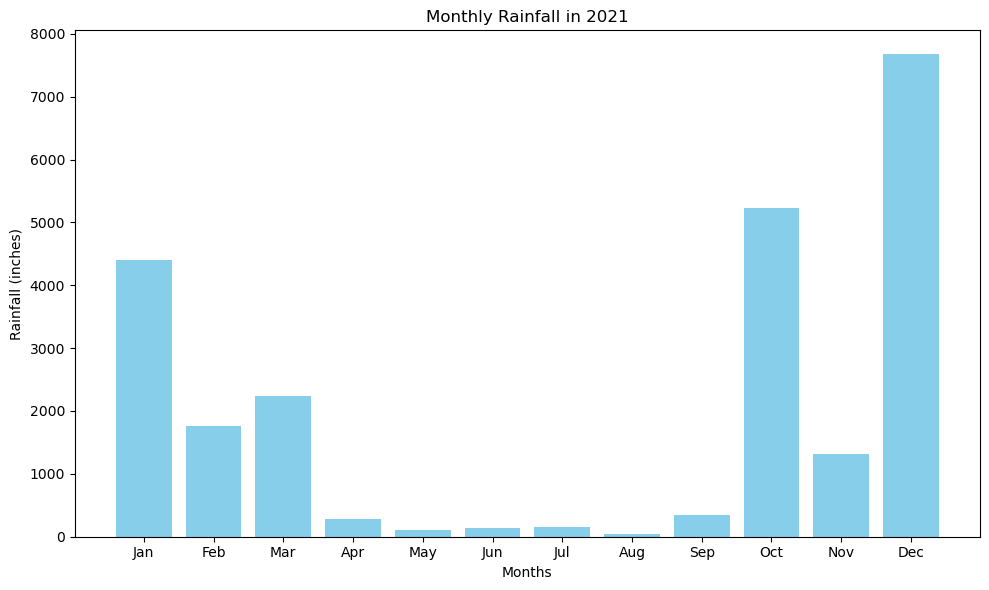

In [7]:
# Extract months and rainfall values from monthly_sums2020
months = list(monthly_sums2021.index)
rainfall_values = list(monthly_sums2021.values)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, rainfall_values, color='skyblue')

# Add labels and title
plt.xlabel('Months')
plt.ylabel('Rainfall (inches)')
plt.title('Monthly Rainfall in 2021')

# Adjust layout for better appearance
plt.tight_layout()

# Ensure output directory exists
output_path = Path("outputs")
os.makedirs(output_path, exist_ok=True)

# Save the plot as an image file in the "outputs" folder
output_file = output_path / "Monthly_Rainfall_2021.png"
plt.savefig(output_file)

# Show the plot (optional)
plt.show()